In [1]:
import os
import os.path as osp

import torch
import numpy as np 
import tifffile
from glob import glob
import matplotlib.pyplot as plt
from mylib import labelme_utils as lu 
from mylib import polSAR_utils as psr
import re
import xml.etree.ElementTree as et

min: -21.935649871826172, max: 3.7013962268829346
min: -27.79914665222168, max: -4.381580829620361
min: -21.036453247070312, max: 1.539386510848999


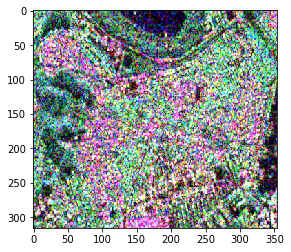

In [2]:
path = r'/home/csl/code/preprocess/PolSAR_car/data/building/E139_N35_日本横滨/降轨/1/20190615/1/s2'
a = psr.read_s2(path)
b = psr.rgb_by_s2(a)
plt.imshow(b)

In [21]:
path = r'/home/csl/code/preprocess/data/MGGF3jihuanBC20210427/GF3_KAS_QPSI_024808_W116.2_N37.0_20210427_L2_AHV_L20005617966/GF3_KAS_QPSI_024808_W116.2_N37.0_20210427_L2_AHV_L20005617966.meta.xml'
tree = et.parse(path)
root = tree.getroot()
pfix = re.match('\{.*\}', root.tag)
tt = 0
for item in root.iter('CalibrationConst'):
    print(item[0].text)

28.810000


In [3]:
path = r'/home/csl/code/preprocess/data/MGGF3jihuanBC20210427/GF3_KAS_QPSI_024808_W116.2_N36.9_20210427_L1A_AHV_L10005617654/C3'
c3 = psr.read_c3(path)

In [4]:
c3 = psr.as_format(c3)
c3.dtype, c3.shape

dtype('complex64')

In [4]:
folder = r'/home/csl/code/preprocess/data/MGGF3jihuanBC20210427/GF3_KAS_QPSI_024808_W116.2_N37.0_20210427_L2_AHV_L20005617966'
file = r'GF3_KAS_QPSI_024808_W116.2_N37.0_20210427_L2_HH_L20005617966.tiff'
img = tifffile.imread(osp.join(folder, file))

In [7]:
img.shape, img.max(), img.min()

((12207, 10796), 65535, 0)

In [ ]:
qualify_value = 1124.562378
K_dB = 28.810000        # calibration const


In [7]:
path = r'/data/csl/PolSAR_building_det/zscored/GF3'
model_path = osp.split(osp.split(path)[0])[0]
osp.join(model_path, f'PCA_{3}')

'/data/csl/PolSAR_building_det/PCA_3'